['NoisyMurmur', '.DS_Store', 'NoisyNormal', 'Untitled.ipynb', 'Artifact Sound', 'Murmur', 'Normal', 'Unt', '.ipynb_checkpoints', 'Extrahls', 'Extrastole', 'Unlabelled ']
Normal files: 230
Murmur files: 98
Extrastole files 45
Artifact files: 40
Extrahls files: 20
TOTAL TRAIN SOUNDS: 433


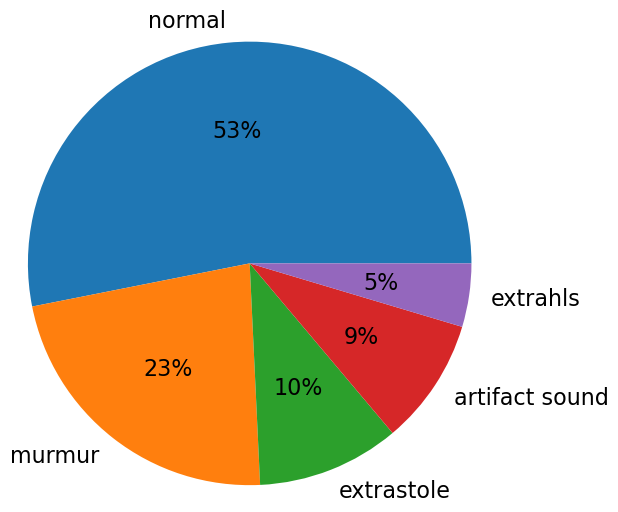

In [1]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files

import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

data_path = "/Users/aryamankedia/Documents/aiheartbeat"
print(os.listdir(data_path))

train_data      = data_path 
unlabel_data    = data_path  + "/Unlabelled/"

normal_data     = train_data + '/Normal/'
murmur_data     = train_data + '/Murmur/'
extrastole_data = train_data + '/Extrastole/'
artifact_data   = train_data + '/Artifact Sound/'
extrahls_data   = train_data + "/Extrahls/"

print("Normal files:", len(os.listdir(normal_data))) #length of normal training sounds
print("Murmur files:",len(os.listdir(murmur_data))) #length of murmur training sounds 
print("Extrastole files", len(os.listdir(extrastole_data))) #length of extrastole training sounds 
print("Artifact files:",len(os.listdir(artifact_data))) #length of artifact training sounds 
print("Extrahls files:",len(os.listdir(extrahls_data))) #length of extrahls training sounds 

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(extrastole_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))



x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'extrastole', 'artifact sound', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

# Listen to rondom audio from specific class
def random_sound (audio_class):
    random_sound = np.random.randint(0,len(os.listdir(audio_class))) 
    sound = os.listdir(audio_class)[random_sound]
    sound = audio_class+sound
    sound,sample_rate = librosa.load(sound)
    return ipd.Audio(sound,rate=sample_rate),sound

# show waveform of audio from dataset 
# X axis, represents time.
# Y-axis measures displacement of air molecules.
# This is where amplitude comes in. It measures how much a molecule is displaced from its resting position.  
import librosa.display
import matplotlib.pyplot as plt

# Function to show waveform of an audio sample
def show_audio_waveform(audio_sample, sr=22050):
    plt.figure(figsize=(20, 5))
    librosa.display.waveshow(audio_sample, sr=sr)  # Use waveshow instead of waveplot
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Audio Waveform")
    plt.show()
    
# show spectrum of audio from dataset 
def show_audio_spectrum(audio_sample):
    sample_rate = 22050
    fft_normal = np.fft.fft(audio_sample)
    magnitude_normal = np.abs(fft_normal)
    freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
    half_freq = freq_normal[:int(len(freq_normal)/2)]
    half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

    plt.figure(figsize=(12,8))
    plt.plot(half_freq,half_magnitude)
    plt.title("Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

# show specrogram of audio from dataset 
# the output is an image that represents a sound. 
# X-axis is for time, y-axis is for frequency and the color is for intensity
def show_spectrogram (audio_sample):    
    # STFT -> spectrogram
    hop_length = 512 # in num. of samples
    n_fft = 2048 # window in num. of samples
    sample_rate = 22050

    # calculate duration hop length and window in seconds
    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate

    print("STFT hop length duration is: {}s".format(hop_length_duration))
    print("STFT window duration is: {}s".format(n_fft_duration))

    # perform stft
    stft_normal = librosa.stft(audio_sample, n_fft=n_fft, hop_length=hop_length)

    # calculate abs values on complex numbers to get magnitude
    spectrogram = np.abs(stft_normal)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # display spectrogram
    plt.figure(figsize=(15,10))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    #plt.set_cmap("YlOrBr")
    plt.title("Spectrogram")

In [19]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.
